___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [2]:
import time
from datetime import date
start = datetime.datetime(2006,1,1)
end =  datetime.datetime(2016,1,1)

In [3]:
BAC = data.DataReader("BAC", 'google', start, end)
C = data.DataReader("C", 'google', start, end)
GS = data.DataReader("GS", 'google', start, end)
JPM = data.DataReader("JPM", 'google', start, end)
MS = data.DataReader("MS", 'google', start, end)
WFC = data.DataReader("WFC", 'google', start, end)

In [4]:
df = data.DataReader(['BAC','C','GS','JPM','MS','WFC'],'google',start,end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [6]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)

** Set the column name levels (this is filled out for you):**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [9]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2016-11-14 to 2017-11-09
Data columns (total 30 columns):
(BAC, Open)      249 non-null float64
(BAC, High)      249 non-null float64
(BAC, Low)       249 non-null float64
(BAC, Close)     250 non-null float64
(BAC, Volume)    250 non-null int64
(C, Open)        249 non-null float64
(C, High)        250 non-null float64
(C, Low)         249 non-null float64
(C, Close)       250 non-null float64
(C, Volume)      250 non-null int64
(GS, Open)       249 non-null float64
(GS, High)       250 non-null float64
(GS, Low)        249 non-null float64
(GS, Close)      250 non-null float64
(GS, Volume)     250 non-null int64
(JPM, Open)      249 non-null float64
(JPM, High)      250 non-null float64
(JPM, Low)       249 non-null float64
(JPM, Close)     250 non-null float64
(JPM, Volume)    250 non-null int64
(MS, Open)       249 non-null float64
(MS, High)       249 non-null float64
(MS, Low)        249 non-null float64
(MS, Close

In [25]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2016-09-23   15.53  15.67  15.50  15.52  51604424  47.02  47.46  46.84  47.15   
2016-09-26   15.40  15.44  15.02  15.09  94972090  46.51  46.63  45.83  45.89   
2016-09-27   15.01  15.34  14.81  15.29  81992627  45.52  46.48  45.16  46.37   
2016-09-28   15.36  15.39  15.15  15.38  66076402  46.58  46.91  46.10  46.87   
2016-09-29   15.38  15.50  15.06  15.16  78997682  46.80  47.40  45.41  45.80   

Bank Ticker              ...        MS                                   WFC  \
Stock Info     Volume    ...      Open   High    Low  Close    Volume   Open   
Date                     ...                                                   
2016-09-23   14793526    ...     32.12  32.25  31.67  31.91   9400557  45.50   
2016-09-26   22646738    ...     31.53  31.57  30.96  31.03  10217675  45.37   
2016-09-27   16165734    ...     30.82  31.49  30.62  31.35   9753462  44.79   
2016-09-28   15871608    ...     31.44  31.80  31.32  31.77   7425143  45.36   
2016-09-29   28066787    ...     31.77  32.11  30.74  31.04  12529741  45.19   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2016-09-23   45.91  45.43  45.74  28710524  
2016-09-26   45.50  44.65  44.88  30937973  
2016-09-27   45.10  44.66  45.09  24359007  
2016-09-28   45.48  44.96  45.31  28220297  
2016-09-29   45.26  44.21  44.37  45266713  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [26]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     25.50
C       71.76
GS     252.89
JPM     95.03
MS      48.31
WFC     59.73
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [27]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [28]:
 for tick in tickers:
    returns[tick+'Return'] = bank_stocks[tick]['Close'].pct_change()

returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2016-09-23,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-26,-0.027706,-0.026723,-0.022104,-0.021859,-0.027578,-0.018802
2016-09-27,0.013254,0.010460,0.008732,0.008817,0.010313,0.004679
2016-09-28,0.005886,0.010783,0.003438,0.005274,0.013397,0.004879
2016-09-29,-0.014304,-0.022829,-0.027531,-0.015890,-0.022978,-0.020746


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

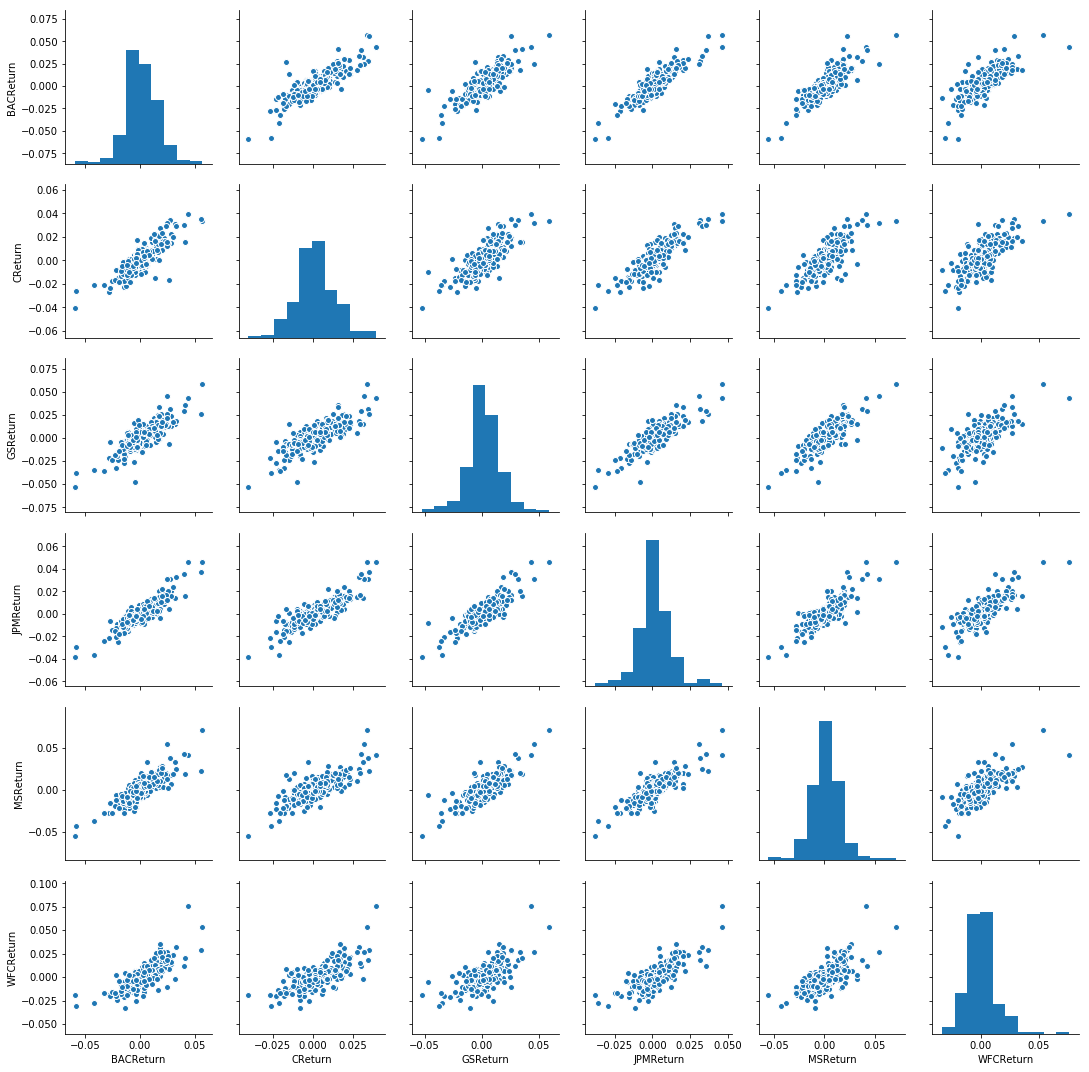

In [29]:
import seaborn as sns
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [30]:
returns.idxmin()

BACReturn   2017-05-17
CReturn     2017-05-17
GSReturn    2017-05-17
JPMReturn   2017-05-17
MSReturn    2017-05-17
WFCReturn   2017-04-13
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [31]:
returns.idxmax()

BACReturn   2016-11-09
CReturn     2016-11-10
GSReturn    2016-11-09
JPMReturn   2016-11-10
MSReturn    2016-11-09
WFCReturn   2016-11-10
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [32]:
returns.std()

BACReturn    0.015142
CReturn      0.012224
GSReturn     0.013809
JPMReturn    0.011072
MSReturn     0.014764
WFCReturn    0.012952
dtype: float64

In [36]:
returns.ix['2015-01-01':'2015-12-31'].std()

BACReturn   NaN
CReturn     NaN
GSReturn    NaN
JPMReturn   NaN
MSReturn    NaN
WFCReturn   NaN
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



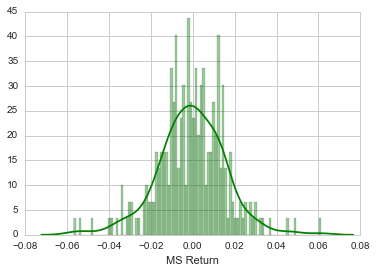

In [94]:
sns.distplot(returns[MSReturn])

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



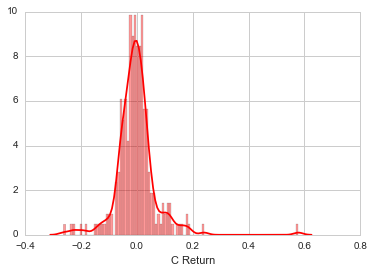

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

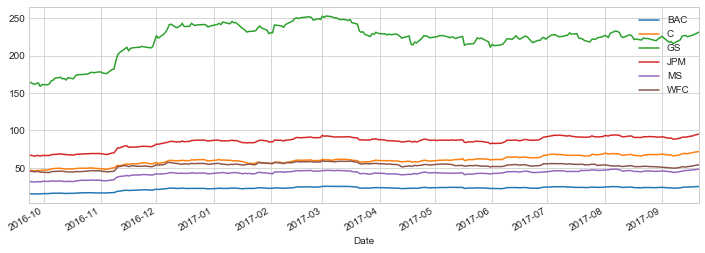

In [38]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

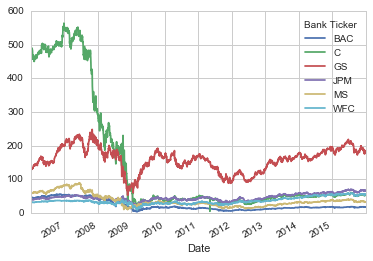

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

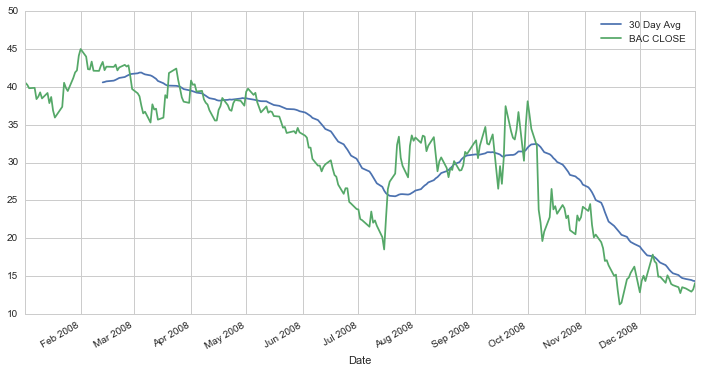

In [141]:
for tick in tickers:
    bank_stocks[tick]['Close'].avg().plot(figsize=(12,4),label=tick)
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

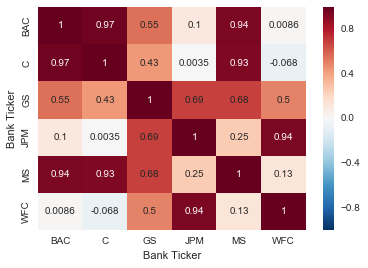

** Optional: Use seaborn's clustermap to cluster the correlations together:**

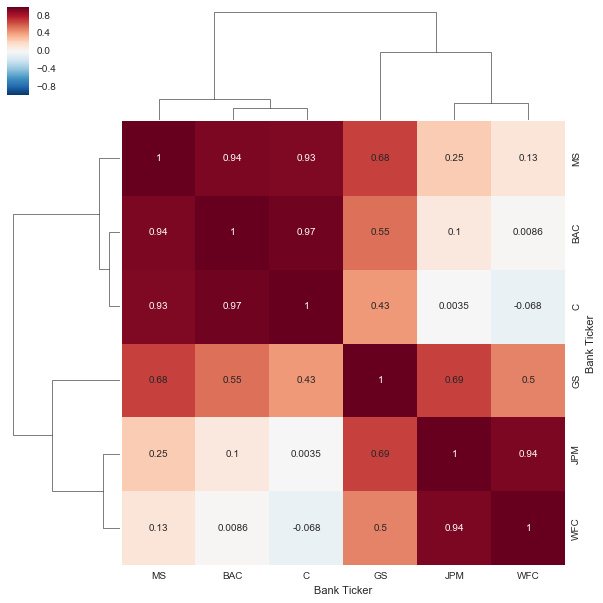

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [11]:
bank_stocks

Bank Ticker    BAC                                      C                \
Stock Info    Open   High    Low  Close     Volume   Open   High    Low   
Date                                                                      
2016-11-14   19.41  20.20  19.40  20.08  320959885  53.04  54.89  53.00   
2016-11-15   19.79  20.18  19.60  20.16  190293076  53.99  55.47  53.71   
2016-11-16   19.78  19.96  19.68  19.75  126734547  54.21  55.00  54.21   
2016-11-17   19.76  20.22  19.70  20.08  167472107  54.60  55.98  54.36   
2016-11-18   20.06  20.14  19.87  20.00  120620238  55.38  55.84  54.98   
2016-11-21   20.10  20.35  20.01  20.33  117479106  55.96  55.99  55.14   
2016-11-22   20.45  20.47  20.12  20.30  104771816  55.66  56.15  55.43   
2016-11-23   20.42  20.66  20.20  20.56  110963157  56.30  56.83  55.81   
2016-11-25   20.62  20.88  20.50  20.86   62610385  56.60  56.80  56.19   
2016-11-28   20.67  20.85  20.25  20.30  108651231  55.86  56.35  55.43   
2016-11-29   20.38  20.54  20.25  20.29  114216829  55.50  55.94  55.32   
2016-11-30   20.77  21.19  20.72  21.12  191699579  56.23  56.72  56.06   
2016-12-01   21.42  21.94  21.34  21.50  199233944  56.77  57.57  56.54   
2016-12-02   21.49  21.50  21.02  21.23  128468708  57.20  57.24  55.93   
2016-12-05   21.47  21.87  21.46  21.84  130377307  56.61  57.53  56.58   
2016-12-06   22.09  22.16  21.72  22.16  120789194  57.98  58.08  57.00   
2016-12-07   22.19  22.57  21.95  22.57  168005152  57.89  59.16  57.89   
2016-12-08   22.79  23.24  22.69  22.95  182693888  59.40  60.80  59.04   
2016-12-09   22.95  23.17  22.78  23.09  130590406  59.96  60.22  59.22   
2016-12-12   23.00  23.25  22.54  22.61  136985960  59.45  60.09  58.87   
2016-12-13   22.80  22.88  22.29  22.61  118204085  59.63  59.97  58.76   
2016-12-14   22.31  23.30  22.21  22.67  225340901  58.96  60.80  58.83   
2016-12-15   22.90  23.39  22.80  23.16  162025814  60.10  60.62  59.56   
2016-12-16   23.32  23.32  22.65  22.66  147497746  60.59  60.61  59.64   
2016-12-19   22.60  22.72  22.33  22.48   97508910  59.49  59.78  58.92   
2016-12-20   22.63  22.83  22.61  22.71   83879520  59.92  60.80  59.92   
2016-12-21   22.72  22.72  22.47  22.63   61079086  60.70  60.91  60.15   
2016-12-22   22.60  22.73  22.47  22.54   67123500  60.66  60.93  60.41   
2016-12-23   22.51  22.65  22.43  22.60   38187752  60.53  61.00  60.38   
2016-12-27   22.71  22.74  22.54  22.61   39988630  61.03  61.30  60.85   
...            ...    ...    ...    ...        ...    ...    ...    ...   
2017-09-29   25.41  25.48  25.31  25.34   66232556  72.55  72.90  72.36   
2017-10-02   25.46  25.65  25.39  25.62   54001378  73.07  73.89  72.91   
2017-10-03   25.75  25.93  25.62  25.86   55946918  73.98  74.38  73.85   
2017-10-04   25.86  25.95  25.70  25.71   53402825  74.18  74.74  73.93   
2017-10-05   25.77  26.23  25.66  26.13   62636891  74.07  75.93  73.85   
2017-10-06   26.25  26.30  26.04  26.21   53900622  75.81  76.02  75.10   
2017-10-09   26.26  26.27  25.76  25.85   55172516  75.83  75.88  75.09   
2017-10-10   25.83  25.95  25.71  25.93   46133801  75.40  75.54  74.63   
2017-10-11   25.93  25.93  25.65  25.67    7963923  74.97  75.24  74.66   
2017-10-12   25.87  25.93  25.34  25.45   71770031  75.82  76.14  72.27   
2017-10-13   25.38  26.00  25.12  25.83  104196860  72.10  72.34  70.91   
2017-10-16   25.87  26.33  25.87  26.24   71927178  71.38  72.58  71.37   
2017-10-17   26.37  26.43  26.11  26.20   48644424  72.24  72.72  72.00   
2017-10-18   26.34  26.55  26.33  26.48   55382456  72.66  73.33  72.55   
2017-10-19   26.20  26.59  26.15  26.58   54542694  72.35  72.94  71.71   
2017-10-20   27.04  27.18  26.90  27.17   83764655  73.76  73.88  73.18   
2017-10-23   27.22  27.43  27.09  27.16   69607678  73.48  74.01  73.43   
2017-10-24   27.35  27.84  27.34  27.68   90346455  73.96  74.75  73.73   
2017-10-25   27.89  27.92  27.34  27.63   81265326  74.48  74.63  73.26   
2017-10-26   27.69  27.98

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.